In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Setting the fontsize of x, y label and title of python plots globally
import matplotlib as mpl
# Set global font sizes
mpl.rcParams['axes.titlesize'] = 12      # Title font size
mpl.rcParams['axes.labelsize'] = 12      # X and Y label font size
mpl.rcParams['xtick.labelsize'] = 10     # X tick label font size
mpl.rcParams['ytick.labelsize'] = 10     # Y tick label font size
mpl.rcParams['legend.fontsize'] = 8     # Legend font size
mpl.rcParams['font.size'] = 12           # General font size (e.g. for text)
mpl.rcParams['figure.dpi'] = 300         # higher dpi = more resolution

# For Interactive window (zoom-in, zoom-out feature)
# %matplotlib widget

# Uncomment the below one high quality plots
# plots and code are in same window
%matplotlib inline  
# for clear image, can be set to 'pdf/png' format also
%config InlineBackend.figure_format = 'retina' 

## Elliptical orbit

#### Nonlinear memory

In [2]:
# FOR - Only GW backreaction ( FAVATA result )
ellip_fgw = np.load("ellip_fgw.npy")
ellip_ygw = np.load("ellip_ygw.npy")
ellip_h20_mem_gw = np.load("ellip_h20_mem_gw.npy")
ellip_h40_mem_gw = np.load("ellip_h40_mem_gw.npy")

# FOR SPIKE - NET effect 
ellip_spike_f_net = np.load("ellip_spike_f_net.npy")
ellip_spike_y_net = np.load("ellip_spike_y_net.npy")
ellip_spike_h20_mem_NET = np.load("ellip_spike_h20_mem_NET.npy")
ellip_spike_h40_mem_NET = np.load("ellip_spike_h40_mem_NET.npy")
%store -r alpha

# FOR NFW - NET effect
ellip_NFW_f_net = np.load("ellip_NFW_f_net.npy")
ellip_NFW_y_net = np.load("ellip_NFW_y_net.npy")
ellip_NFW_h20_mem_NET = np.load("ellip_NFW_h20_mem_NET.npy")
ellip_NFW_h40_mem_NET = np.load("ellip_NFW_h40_mem_NET.npy")

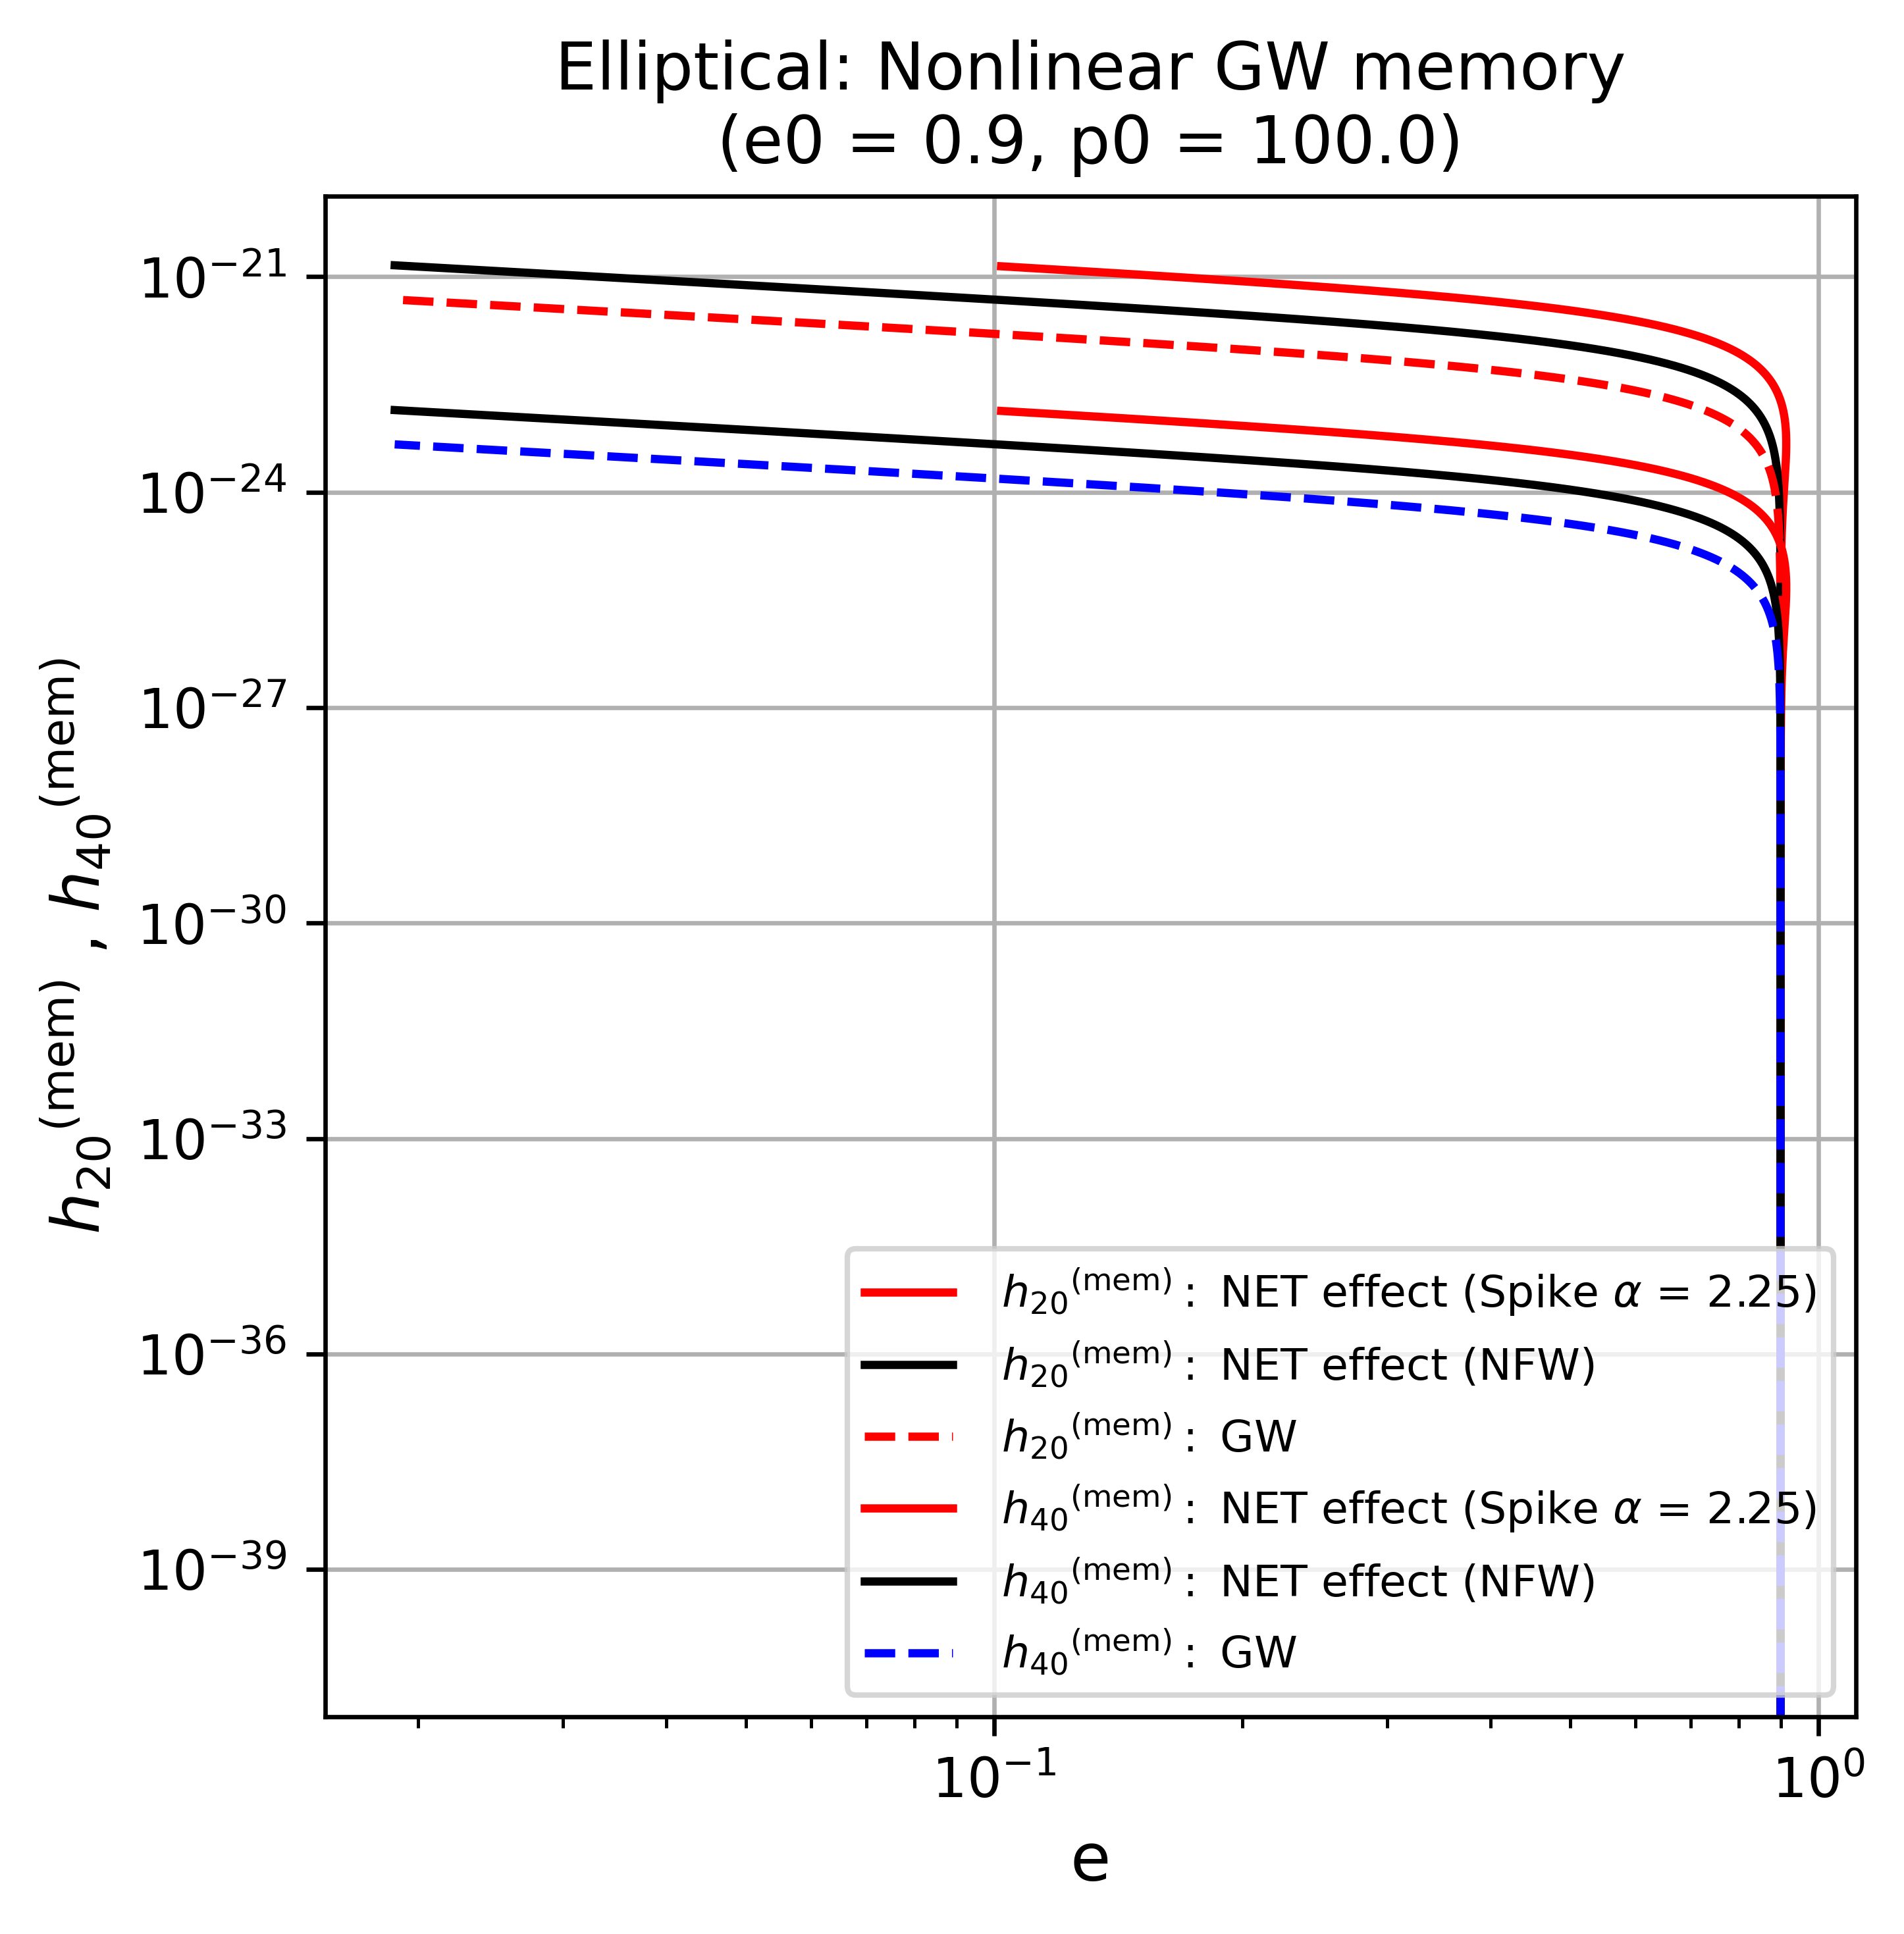

In [3]:
# Plotting
plt.figure(figsize=(5,5))
plt.title('Elliptical: Nonlinear GW memory' + "\n" + f'(e0 = {ellip_ygw[0,0]}, p0 = {ellip_ygw[1,0]})')

plt.plot( ellip_spike_y_net[0,:], ellip_spike_h20_mem_NET, label = r' ${h_{20}}^{\text{(mem)}}:$' +' NET effect (Spike '+r'${{\alpha}}$'+f' = {alpha})', linestyle='-', color='red' )
plt.plot( ellip_NFW_y_net[0,:], ellip_NFW_h20_mem_NET, label = r' ${h_{20}}^{\text{(mem)}}:$' +' NET effect (NFW)', linestyle='-', color='black' )
plt.plot( ellip_ygw[0,:], ellip_h20_mem_gw, label= r' ${h_{20}}^{\text{(mem)}}: $' + ' GW', linestyle='--', color='red')

plt.plot( ellip_spike_y_net[0,:], ellip_spike_h40_mem_NET, label = r' ${h_{40}}^{\text{(mem)}}:$' +' NET effect (Spike '+r'${{\alpha}}$'+f' = {alpha})', linestyle='-', color='red' )
plt.plot( ellip_NFW_y_net[0,:], ellip_NFW_h40_mem_NET, label = r' ${h_{40}}^{\text{(mem)}}:$' +' NET effect (NFW)', linestyle='-', color='black' )
plt.plot( ellip_ygw[0,:], ellip_h40_mem_gw, label= r' ${h_{40}}^{\text{(mem)}}: $' + ' GW', linestyle='--', color='blue')

plt.xlabel('e')
plt.ylabel(r' ${h_{20}}^{\text{(mem)}}$ , ${h_{40}}^{\text{(mem)}}$')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right')
plt.grid(True)

# Save as PDF
plt.savefig("elliptical_compare_plot_1.pdf", format="pdf", bbox_inches="tight")

plt.show()

#### Nonlinear memory GW polarization

In [4]:
# FOR - Without DM
ellip_hp_f_mem_without_DM = np.load("ellip_hp_f_mem_without_DM.npy")
ellip_pos_freq_without_DM = np.load("ellip_pos_freq_without_DM.npy")

# FOR - Spike DM
ellip_hp_f_mem_with_spike_DM_NET = np.load("ellip_hp_f_mem_with_spike_DM_NET.npy")
ellip_pos_freq_with_spike_DM_NET = np.load("ellip_pos_freq_with_spike_DM_NET.npy")

# FOR - NFW DM
ellip_hp_f_mem_with_NFW_DM_NET = np.load("ellip_hp_f_mem_with_NFW_DM_NET.npy")
ellip_pos_freq_with_NFW_DM_NET = np.load("ellip_pos_freq_with_NFW_DM_NET.npy")

In [5]:
# Noise spectral density of LISA
def LISA_noise_psd(f_without_DM, f_with_DM):
    if len(f_without_DM) >= len(f_with_DM):
        frq = f_without_DM
    else:
        frq = f_with_DM
    
    Sh_inst = 9.18e-52 * frq**(-4) + 1.59e-41 + 9.18e-38 * (frq**2)
    Sh_gal = 2.1e-45 * (frq**(-7/3))
    Sh_exgal = 4.2e-47 * (frq**(-7/3))
    mission = 1.5/(3600*24*365) # taken 1.5 per year
    dNdf = 2e-3 * (frq**(-11/3))
    
    deno = np.exp(-mission*dNdf)
    # Get the smallest positive number that can be differentiated from zero
    epsilon = 1e-16
    if np.any(deno==0):
        deno[ deno == 0 ] = epsilon
    
    return frq, np.sqrt(np.minimum(( Sh_inst/deno ) + Sh_exgal, Sh_inst + Sh_gal + Sh_exgal))

# Noise spectral density of GWSat
def GWSat_noise_psd(f_without_DM, f_with_DM):
    if len(f_without_DM) >= len(f_with_DM):
        frq = f_without_DM
    else:
        frq = f_with_DM
    return frq, np.sqrt( ( 1e-25 * frq**(-2) + 1e-23 + 1e-24 * frq**(-1))**2 )

# Load the Strain sensitivity of various GW detectors
CE_data = np.loadtxt('cosmic_explorer_40km_lf_strain.txt')         # Cosmic explorer data
ET_data = np.loadtxt('ET-0002A-18_ETBSensitivityCurveTxtFile.txt') # Einstein telescope low frequency data
aLIGO_data = np.loadtxt('aLIGODesign.txt')

# GW detectors noise spectrum : Split into frequency and noise strain
CE_frequency = CE_data[:, 0] # Cosmic explorer
CE_strain = CE_data[:, 1]
ET_frequency = ET_data[:, 0] # Einstein telescope
ET_strain = ET_data[:, 1]
aLIGO_frequency = aLIGO_data[:, 0]  # Advanced LIGO
aLIGO_strain = aLIGO_data[:, 1]
LISA_frequency, LISA_strain = LISA_noise_psd(ellip_pos_freq_without_DM, ellip_pos_freq_with_NFW_DM_NET)  # LISA
GWSat_frequency, GWSat_strain = GWSat_noise_psd(ellip_pos_freq_without_DM, ellip_pos_freq_with_NFW_DM_NET)  # GWsat

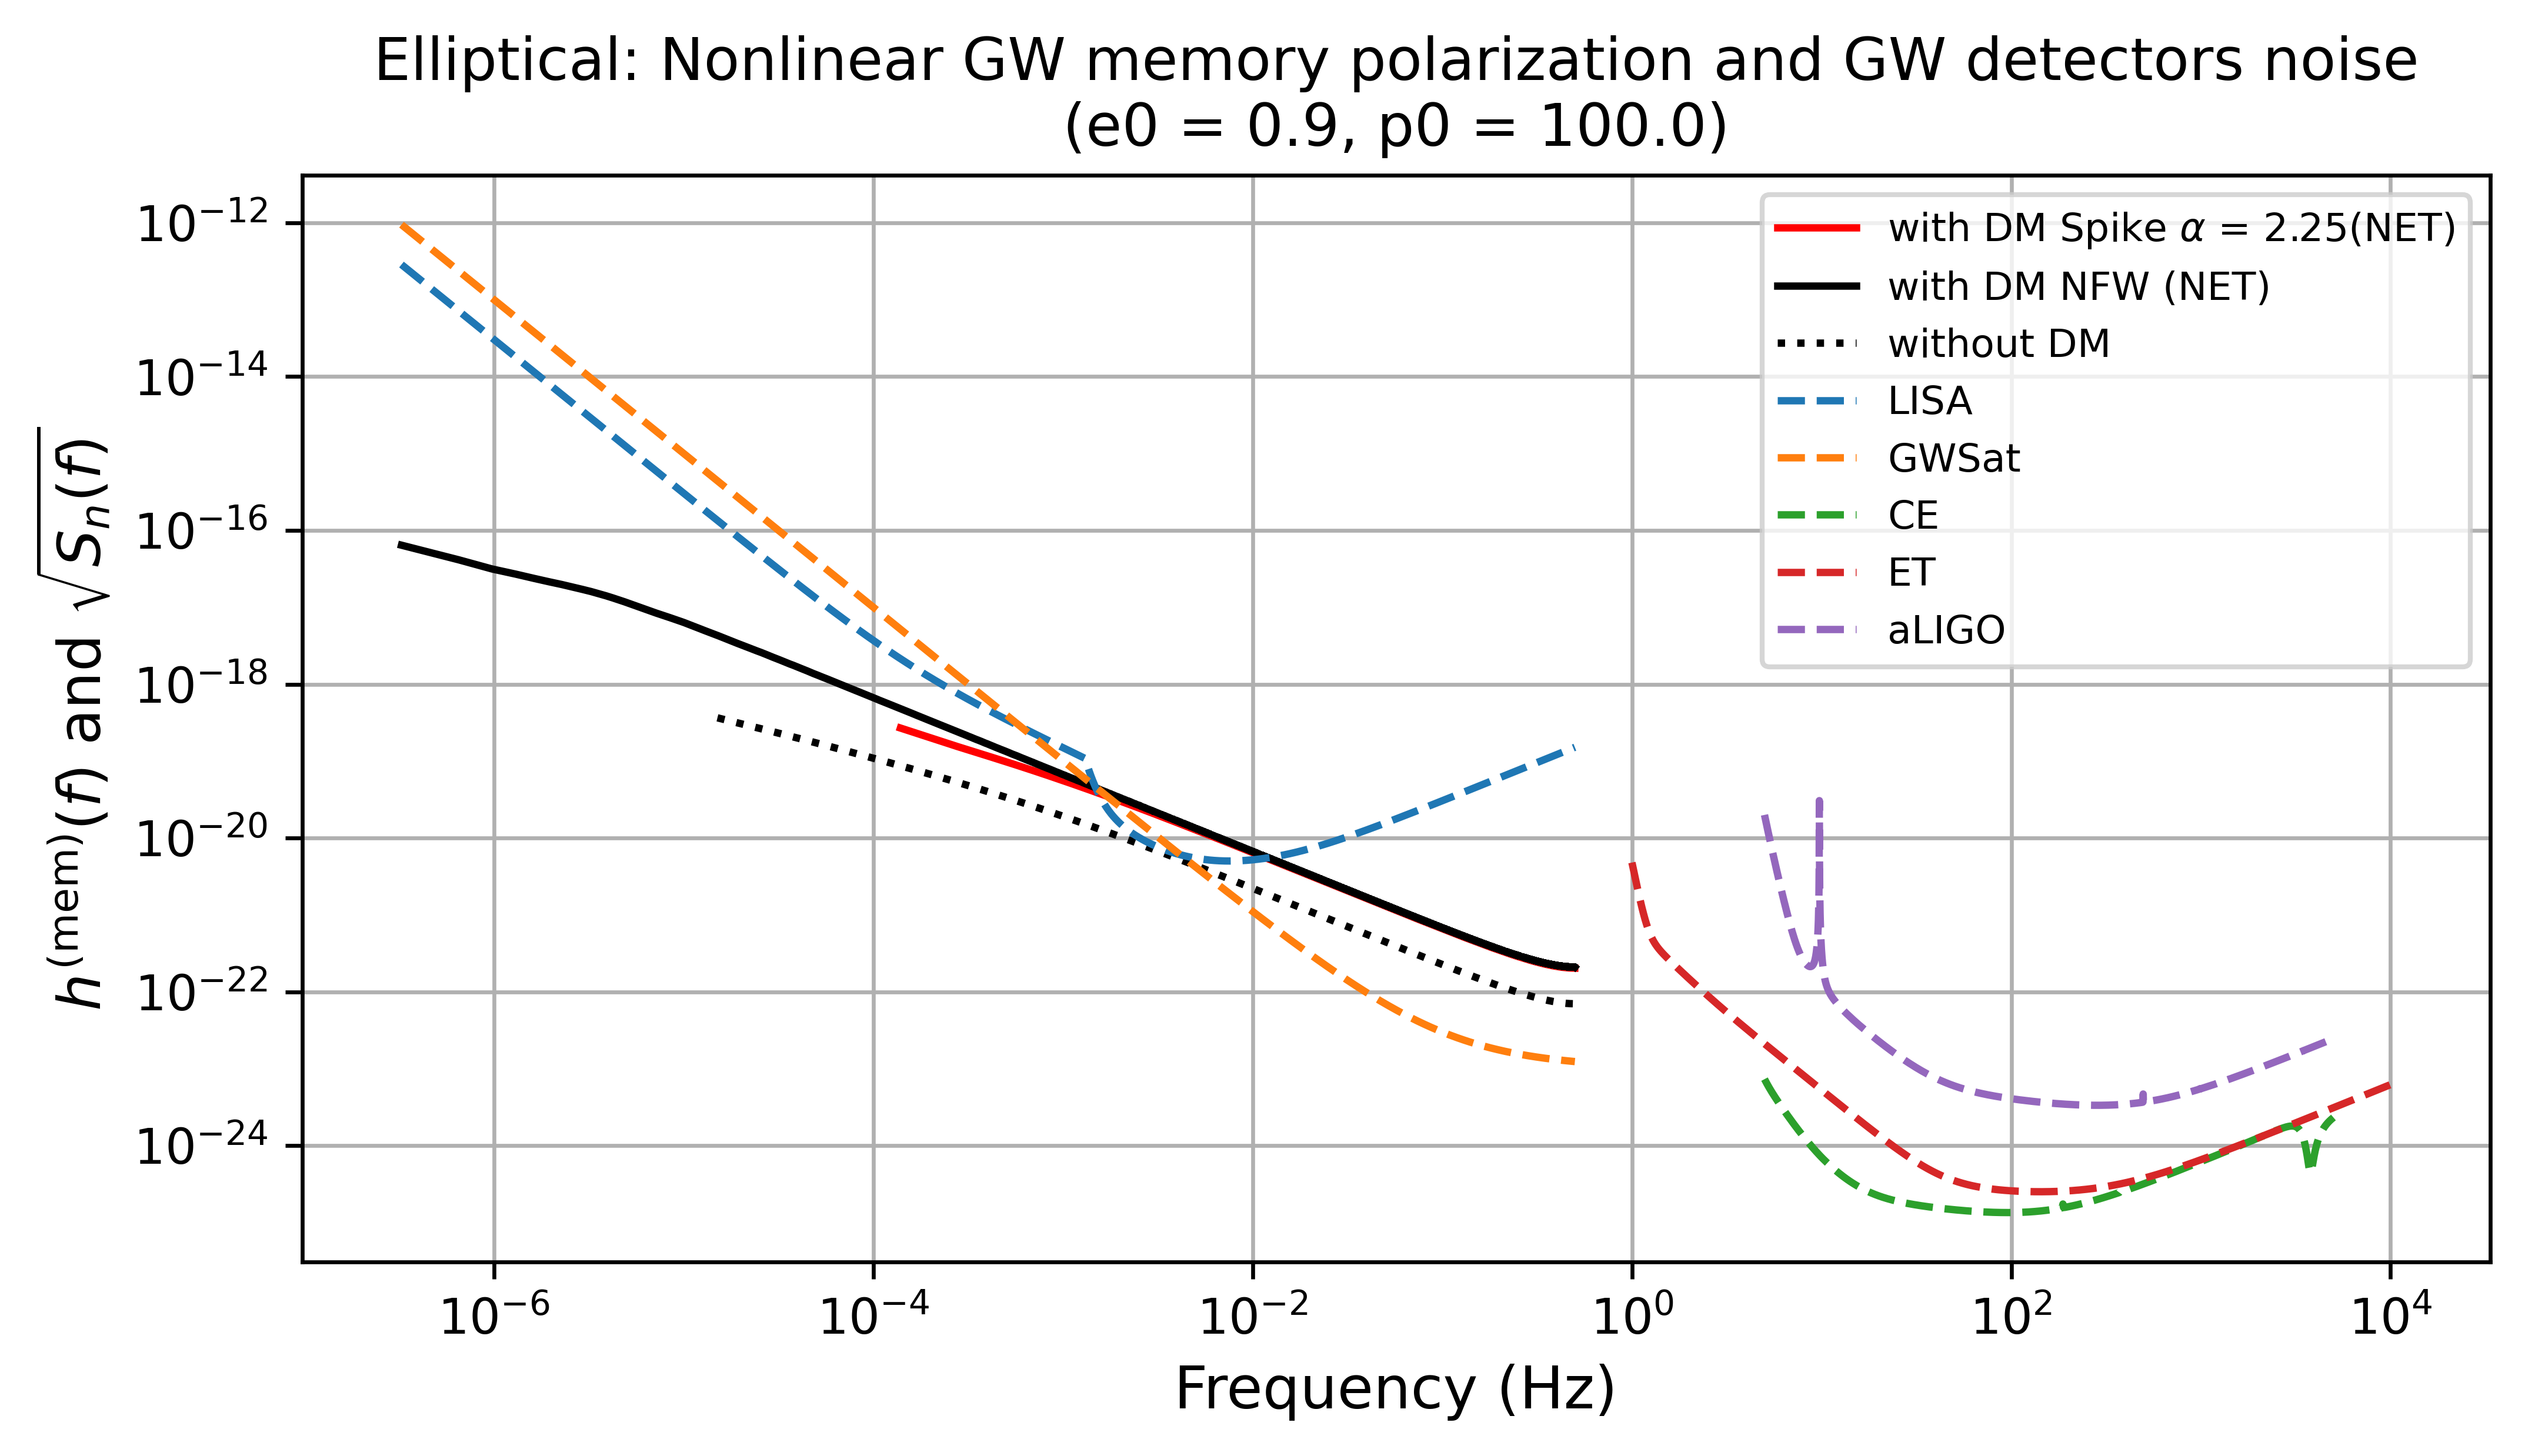

In [6]:
# Plotting : Nonlinear memory GW polarisation frequency spectrum VS noise PSD of various GW detectors
plt.figure(figsize=(8,4))
plt.title('Elliptical: Nonlinear GW memory polarization and GW detectors noise'+"\n"+f'(e0 = {ellip_ygw[0,0]}, p0 = {ellip_ygw[1,0]})')


plt.plot(ellip_pos_freq_with_spike_DM_NET, ellip_hp_f_mem_with_spike_DM_NET, color='red', linestyle='-', label='with DM Spike '+r'${{\alpha}}$'+f' = {alpha}'+'(NET)')
plt.plot(ellip_pos_freq_with_NFW_DM_NET, ellip_hp_f_mem_with_NFW_DM_NET, color='black', linestyle='-', label='with DM NFW '+'(NET)')
plt.plot(ellip_pos_freq_without_DM, ellip_hp_f_mem_without_DM, color='black', linestyle=':', label='without DM')

plt.plot(LISA_frequency, LISA_strain, linestyle='--', label='LISA')
plt.plot(GWSat_frequency, GWSat_strain, linestyle='--', label='GWSat')
plt.plot(CE_frequency, CE_strain, linestyle='--', label='CE')
plt.plot(ET_frequency, ET_strain, linestyle='--', label='ET')
plt.plot(aLIGO_frequency, aLIGO_strain, linestyle='--', label='aLIGO')
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'$h^{\text{(mem)}}(f)$ and $\sqrt{S_n (f)}$')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.grid(True)

# Save as PDF
plt.savefig("elliptical_compare_plot_2.pdf", format="pdf", bbox_inches="tight")

plt.show()

## Hyperbolic orbit

#### Nonlinear memory

In [7]:
# FOR - Only GW backreaction ( FAVATA result )
hyp_fgw = np.load("hyp_fgw.npy")
hyp_ygw = np.load("hyp_ygw.npy")
hyp_h20_mem_gw = np.load("hyp_h20_mem_gw.npy")
hyp_h40_mem_gw = np.load("hyp_h40_mem_gw.npy")

# FOR SPIKE - NET effect 
hyp_spike_f_net = np.load("hyp_spike_f_net.npy")
hyp_spike_y_net = np.load("hyp_spike_y_net.npy")
hyp_spike_h20_mem_NET = np.load("hyp_spike_h20_mem_NET.npy")
hyp_spike_h40_mem_NET = np.load("hyp_spike_h40_mem_NET.npy")
%store -r alpha

# FOR NFW - NET effect
hyp_NFW_f_net = np.load("hyp_NFW_f_net.npy")
hyp_NFW_y_net = np.load("hyp_NFW_y_net.npy")
hyp_NFW_h20_mem_NET = np.load("hyp_NFW_h20_mem_NET.npy")
hyp_NFW_h40_mem_NET = np.load("hyp_NFW_h40_mem_NET.npy")

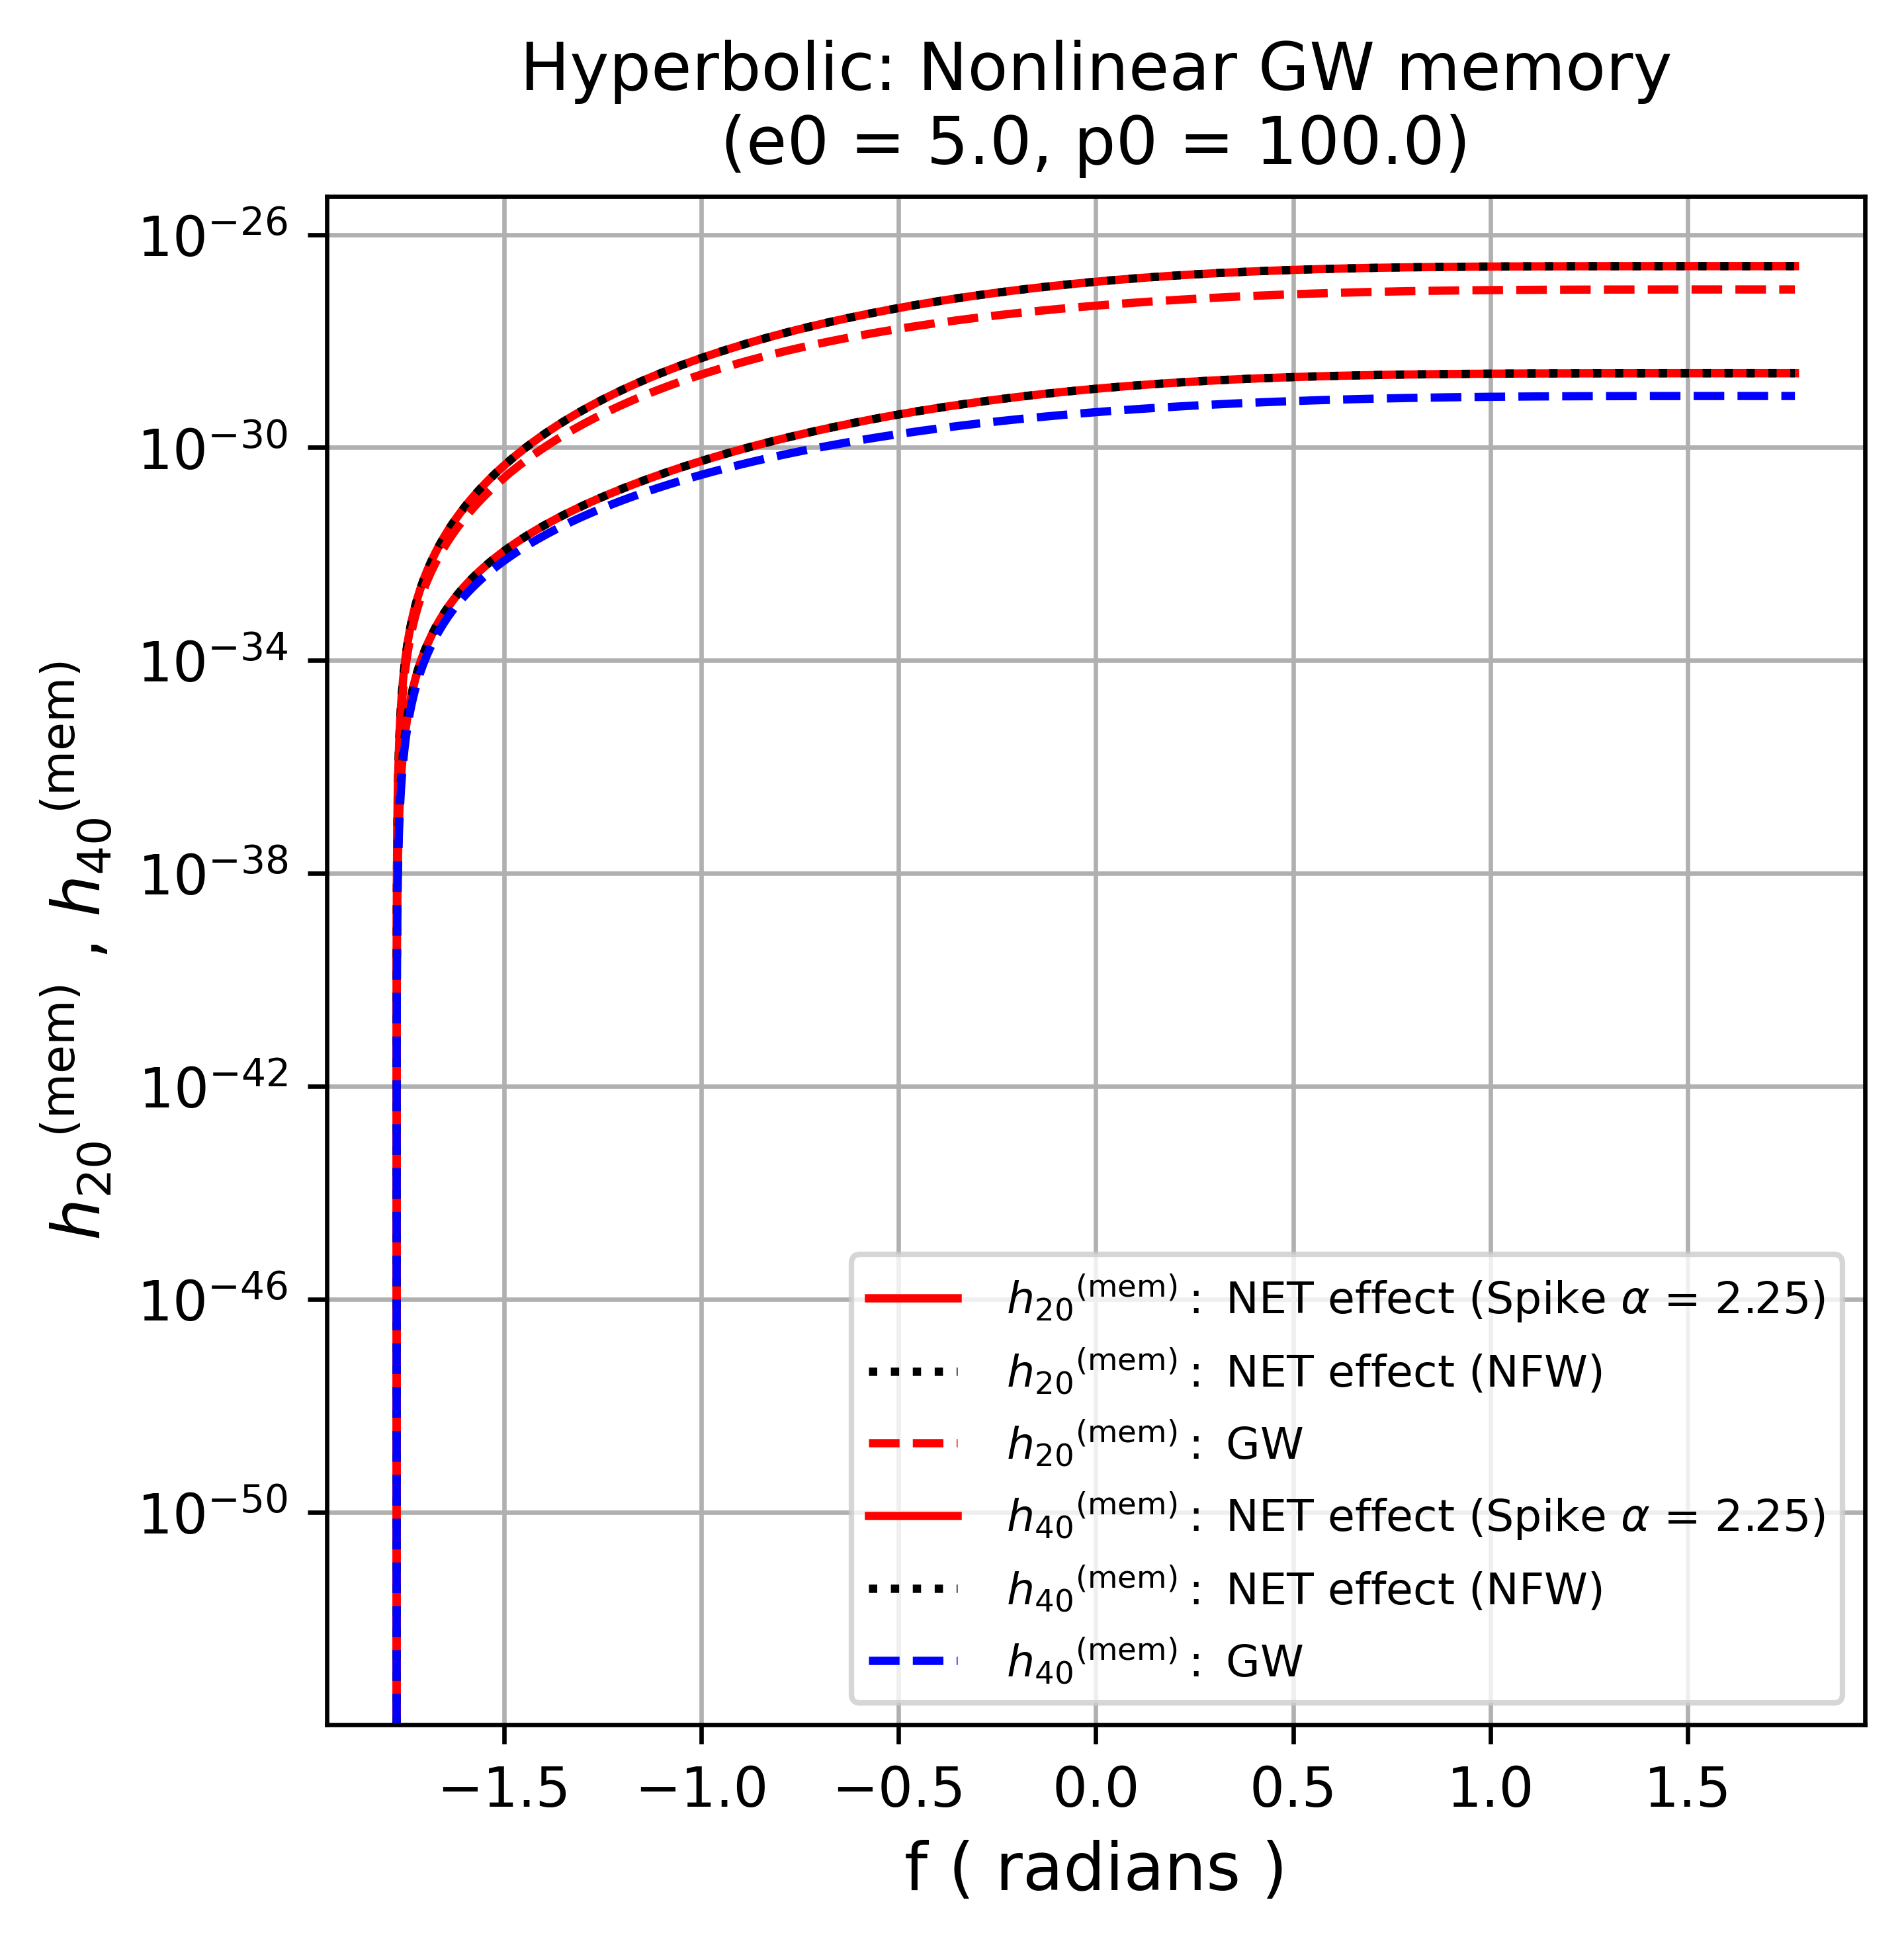

In [8]:
# Plotting
plt.figure(figsize=(5,5))
plt.title('Hyperbolic: Nonlinear GW memory' + "\n" + f'(e0 = {hyp_ygw[0,0]}, p0 = {hyp_ygw[1,0]})')

plt.plot( hyp_spike_f_net, hyp_spike_h20_mem_NET, label = r' ${h_{20}}^{\text{(mem)}}:$' +' NET effect (Spike '+r'${{\alpha}}$'+f' = {alpha})', linestyle='-', color='red' )
plt.plot( hyp_NFW_f_net, hyp_NFW_h20_mem_NET, label = r' ${h_{20}}^{\text{(mem)}}:$' +' NET effect (NFW)', linestyle=':', color='black' )
plt.plot( hyp_fgw, hyp_h20_mem_gw, label= r' ${h_{20}}^{\text{(mem)}}: $' + ' GW', linestyle='--', color='red')

plt.plot( hyp_spike_f_net, hyp_spike_h40_mem_NET, label = r' ${h_{40}}^{\text{(mem)}}:$' +' NET effect (Spike '+r'${{\alpha}}$'+f' = {alpha})', linestyle='-', color='red' )
plt.plot( hyp_NFW_f_net, hyp_NFW_h40_mem_NET, label = r' ${h_{40}}^{\text{(mem)}}:$' +' NET effect (NFW)', linestyle=':', color='black' )
plt.plot( hyp_fgw, hyp_h40_mem_gw, label= r' ${h_{40}}^{\text{(mem)}}: $' + ' GW', linestyle='--', color='blue')

plt.xlabel('f ( radians )')
plt.ylabel(r' ${h_{20}}^{\text{(mem)}}$ , ${h_{40}}^{\text{(mem)}}$')
plt.yscale('log')
plt.legend(loc='lower right')
plt.grid(True)

# Save as PDF
plt.savefig("hyperbolic_compare_plot_1.pdf", format="pdf", bbox_inches="tight")

plt.show()

#### Overall memory jump

In [9]:
e = np.load("e.npy")
%store -r p_i

# WITHOUT DM - Only GW backreaction ( FAVATA result )
hyp_h20jump_without_DM = np.load("hyp_h20jump_without_DM.npy")
hyp_h40jump_without_DM = np.load("hyp_h40jump_without_DM.npy")

# FOR SPIKE - NET effect
hyp_h20jump_with_DM_spike = np.load("hyp_h20jump_with_DM_spike.npy")
hyp_h40jump_with_DM_spike = np.load("hyp_h40jump_with_DM_spike.npy")

# FOR NFW - NET effect
hyp_h20jump_with_DM_NFW = np.load("hyp_h20jump_with_DM_NFW.npy")
hyp_h40jump_with_DM_NFW = np.load("hyp_h40jump_with_DM_NFW.npy")

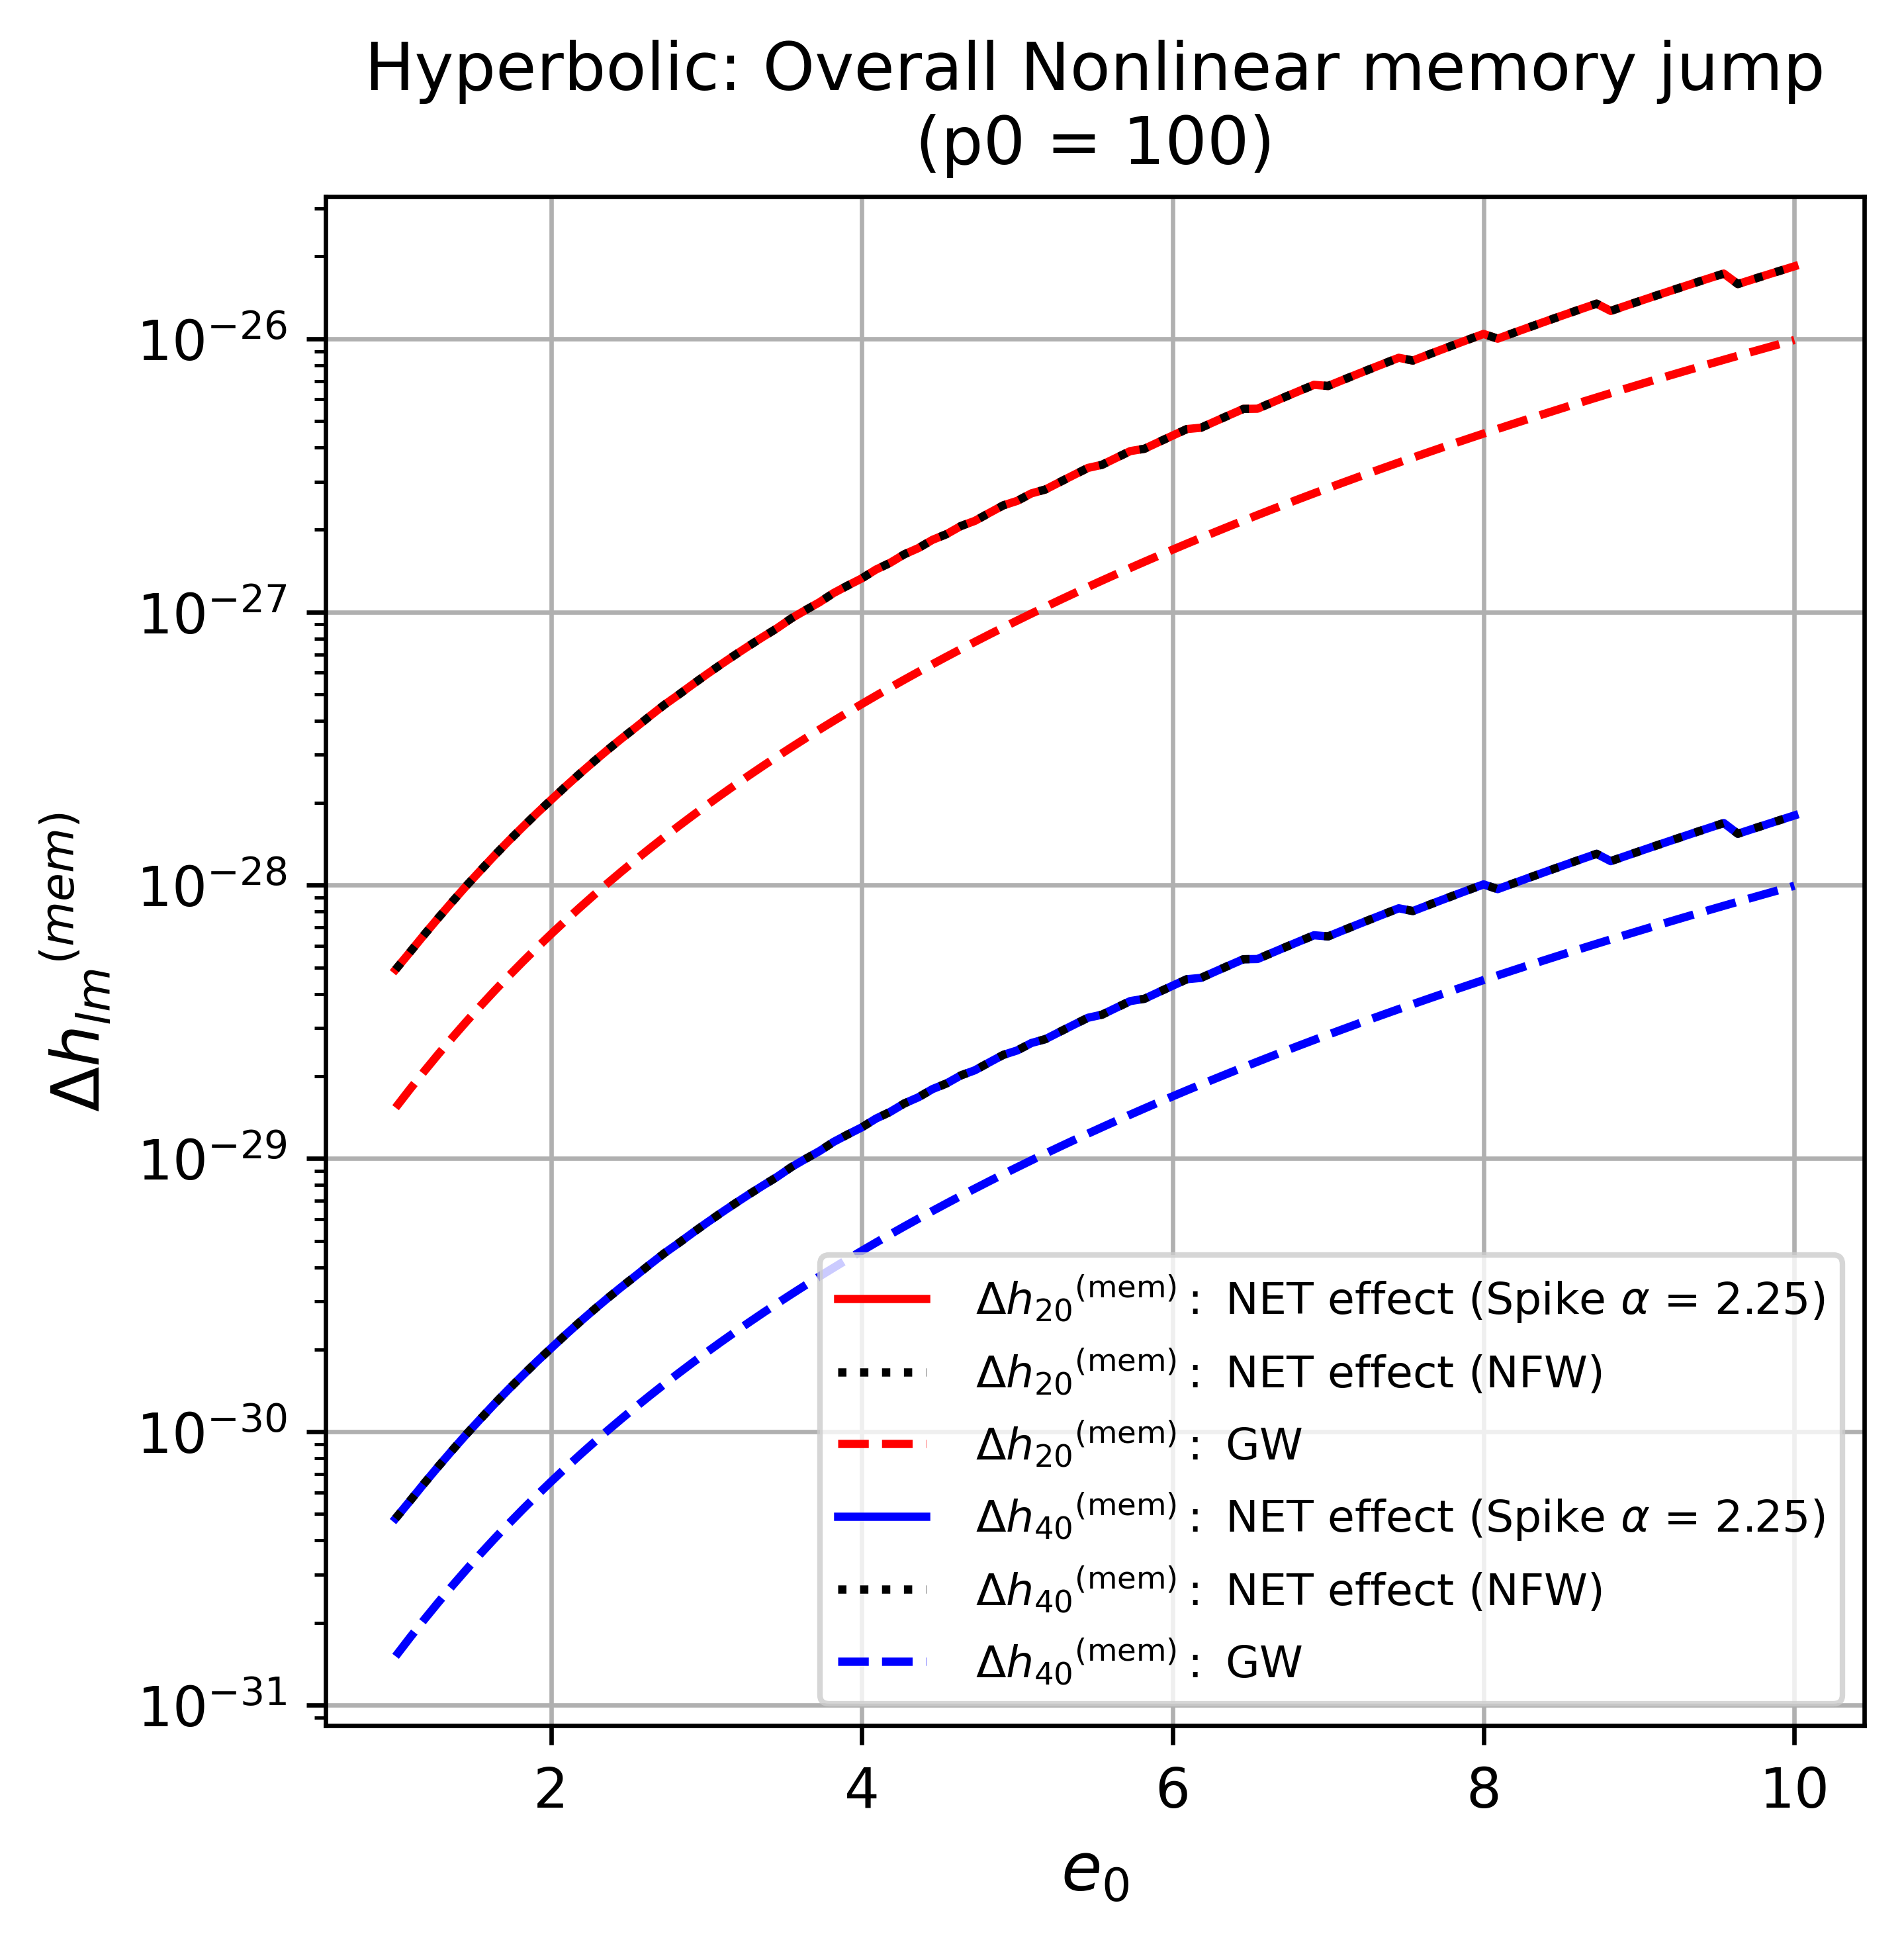

In [10]:
# Plotting
plt.figure(figsize=(5,5))
plt.title('Hyperbolic: Overall Nonlinear memory jump' + "\n" + f'(p0 = {p_i})')

plt.plot( e, hyp_h20jump_with_DM_spike, label = r' $\Delta {h_{20}}^{\text{(mem)}}:$' +' NET effect (Spike '+r'${{\alpha}}$'+f' = {alpha})', linestyle='-', color='red' )
plt.plot( e, hyp_h20jump_with_DM_NFW, label = r' $\Delta {h_{20}}^{\text{(mem)}}:$' +' NET effect (NFW)', linestyle=':', color='black' )
plt.plot( e, hyp_h20jump_without_DM, label= r' $\Delta {h_{20}}^{\text{(mem)}}: $' + ' GW', linestyle='--', color='red')

plt.plot( e, hyp_h40jump_with_DM_spike, label = r' $\Delta {h_{40}}^{\text{(mem)}}:$' +' NET effect (Spike '+r'${{\alpha}}$'+f' = {alpha})', linestyle='-', color='blue' )
plt.plot( e, hyp_h40jump_with_DM_NFW, label = r' $\Delta {h_{40}}^{\text{(mem)}}:$' +' NET effect (NFW)', linestyle=':', color='black' )
plt.plot( e, hyp_h40jump_without_DM, label= r' $\Delta {h_{40}}^{\text{(mem)}}: $' + ' GW', linestyle='--', color='blue')

plt.xlabel(r'$e_0$')
plt.ylabel(r'$\Delta {h_{lm}}^{(mem)}$')
# plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right')
plt.grid(True)

# Save as PDF
plt.savefig("hyperbolic_compare_plot_2.pdf", format="pdf", bbox_inches="tight")

plt.show()